## 6. 추세선 그리기

이번에는 인구수와 CCTV 수를 산점도로 그려볼게요. scatter를 사용하면 산점도를 그릴 수 있고, s는 마커의 크기입니다.(마커가 뭔지 모른다면 숫자를 늘렸다 줄였다 해보세요!)

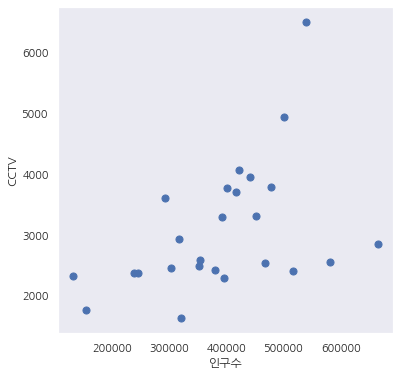

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(data_result_gby21['인구수'], data_result_gby21['총계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

각각의 코드가 무엇을 의미하는지 모른다면 matplotlib의 scatter를 좀더 보고오세요:)

 인구수를 보면 x축이 100,000부터 시작해 700,000까지 있죠? 기억해두시면 이따가 추세선 그릴 때 또 쓰일 거에요.

**추세선 그리기 - 선형 회귀선**

통계 관련 수업을 듣지 않았거나 이 부분을 읽어도 이해가 가지 않는다면, 코드만 복붙해서 실행해보고 넘어가면 됩니다!

이제는 경향을 보고 싶어요. 아까 상관계수가 어느 정도 약하게 있다고 나왔잖아요. 그래서 이 데이터로 경향성을 나타낼 수 있는 하나의 직선을 만들어줄 겁니다. 우리가 넘파이 실습과제에서 하나의 선을 그렸듯이 넘파이의 polyfit 함수를 사용해서 만들어줄 거에요. polyfit()은 n차 다항식으로 회귀분석을 할 때 사용하는 함수에요.

np.polyfit(x, y, n): x는 x에 들어갈 데이터, y는 y에 들어갈 데이터, n는 다항식의 차수
우리가 그리고 싶은 추세선은 직선이라 y=ax+b라고 하죠. 직선은 1차원이니까 n=1이고, polyfit의 결과값은 [a,b]가 나오게 됩니다. 즉, 기울기와 절편값이 나오는거죠. 우리가 통계 기초 과목에서 요 a,b값을 구하려고, 일일이 하나씩 다 계산해서 정말 힘들게 계산했잖아요. 그런데 이렇게 polyfit()을 사용하면 바로 기울기와 절편값을 줍니다. 2,3,4 등 n차원까지 모두 가능해요.

In [ ]:
fp1 = np.polyfit(data_result_gby21['인구수'], data_result_gby21['총계'],1)
fp1

array([3.88010343e-03, 1.57020833e+03])

그럼 이건 주어진 데이터를 가지고 만들어낸 1차 방정식의 기울기와 절편값이에요. 그 다음에는 **poly1d()**를 가지고 직선을 만들어볼게요.

[poly1d()란](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)

poly1d는 다항식(polynomial function)을 정의해주는 함수에요. 즉, 우리가 poly1d() 안에 [a,b]를 넣는다면, ax+b라는 1차 방정식을 넣어주는거죠. 만약 poly1d([1,2,3])이라면 x^2+2x+3을 만들어주는 것이구요.

In [ ]:
f1 = np.poly1d(fp1)
f1

poly1d([3.88010343e-03, 1.57020833e+03])

f1 자체가 방정식이니까, 직선을 만드려면 x값을 공급해줘야해요. 그 x값은 np.linspace로 만들어 줄 거에요.

- np.linspace(start, stop, num): num은 데이터 개수

In [ ]:
fx = np.linspace(100000, 700000, 100)

그러니까 정리를 하면, x에는 fx를 공급해주고, y로는 다항식을 만들어 준 f1을 넣어주는 것이죠. 그래서 점선의 일차원 그래프를 만들어보면!

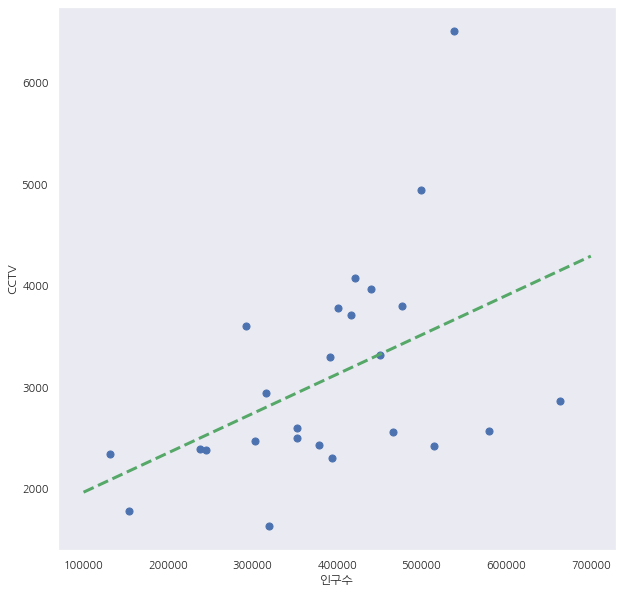

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data_result_gby21['인구수'], data_result_gby21['총계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이렇게 추세선 완성! 오, CCTV와 인구수에 이런 추세선이 그려지는 군요.

여기에다가 두 가지 장치를 더할거예요. 하나는 **직선의 경향에서 멀어진 구일수록 색이 변한다**, 다른 하나는 **경향에서 멀어진 구의 이름을 표시하고 싶다**는 거에요. 그래서 이를 표시하기위해 오차를 계산하는 코드를 만들었어요.

- **오차 = |(CCTV수) - f1(인구수)|**

엇, 이거 우리 회귀분석할 때 선형 회귀식을 만들 때 봤죠? 아까 우리가 추세선을 만들었잖아요. 그 추세선이 바로 **회귀식**이랍니다. **오차는 회귀선을 통해서 나온 y값과 실제 y값의 차이**잖아요. 그래서 이것을 이용해서 오차를 계산하고, data_result에다 새로운 컬럼으로 넣어주어봤습니다.

In [ ]:
fp1 = np.polyfit(data_result_gby21['인구수'], data_result_gby21['총계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 오차 칼럼 만들어주기 
data_result_gby21['오차'] = np.abs(data_result_gby21['총계'] - f1(data_result_gby21['인구수']))
data_result_gby21.head()

,인구수,세대당인구,외국인비율,고령자비율,총계,최근증가율,CCTV비율,오차
구별,,,,,,,,
강남구,537800,2.28,0.884716,14.545556,6502,118.092329,1.209000,2845.072046
강동구,466472,2.29,0.816341,15.878767,2547,180.000000,0.546013,833.167937
강북구,302563,2.07,1.117453,21.262679,2462,463.386728,0.813715,282.184064
강서구,579768,2.12,0.940549,15.964662,2560,233.013699,0.441556,1259.768135
관악구,499449,1.76,2.753034,15.991823,4942,98.866499,0.989490,1433.877893


그럼 '오차'를 기준으로 데이터를 정렬해보도록 할게요.

In [ ]:
df_sort = data_result_gby21.sort_values(by='오차', ascending=False)
df_sort.head()

,인구수,세대당인구,외국인비율,고령자비율,총계,최근증가율,CCTV비율,오차
구별,,,,,,,,
강남구,537800,2.28,0.884716,14.545556,6502,118.092329,1.209000,2845.072046
관악구,499449,1.76,2.753034,15.991823,4942,98.866499,0.989490,1433.877893
송파구,663965,2.33,0.847484,14.713276,2854,360.891089,0.429842,1292.461203
강서구,579768,2.12,0.940549,15.964662,2560,233.013699,0.441556,1259.768135
도봉구,319373,2.29,0.628419,20.089363,1629,190.072202,0.510062,1180.408603


혹시 csv, excel 파일로 저장하고 싶다면 to_csv(), to_excel()을 이용하시면 됩니다. 다음 커리큘럼에서 활용할테니 저장해 두시기 바랍니다.

In [ ]:
# df.to_csv('원하는 저장 경로/원하는 이름.csv', encoding = '원하는 인코딩')
# df.to_excel('원하는 저장 경로/원하는 이름.csv', encoding = '원하는 인코딩')

# 원하는 위치에 저장하세요!
df_sort.to_csv('C:/week1/cctv_result.csv', encoding = 'utf-8')

그럼 이제 텍스트와 color map을 입혀볼게요.

- color: plt.scatter()의 c 옵션값으로 넣어줬어요.
- plt.text(x, y, s): x와 y는 (x,y)위치(the position to place the text), s는 넣어줄 텍스트(the text)

우리 파이썬을 배웠기 때문에 아래의 for문 이해할 수 있겠죠?💖

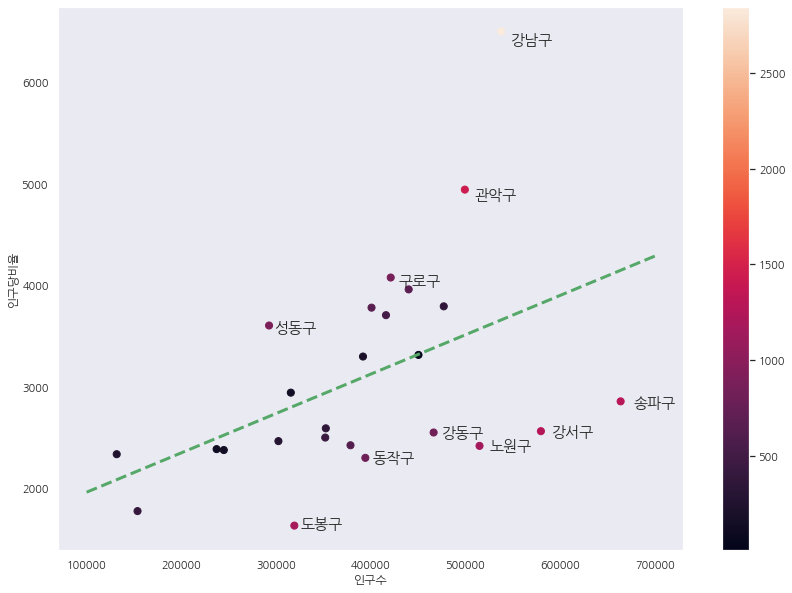

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(data_result_gby21['인구수'], data_result_gby21['총계'],
           c=data_result_gby21['오차'], s=50)                   #c=marker color, s=marker size
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')       #lw=line width

# 텍스트 만들어주기
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98,   
            df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

df_sort는 오차가 높은 순으로 배열을 해놓았죠. 그래서 for문을 사용해 range(10), 즉 상위 10개만 text를 보이도록 해줬어요.

- df_sort['인구수'][n]1.02, df_sort['소계'][n]0.98

이렇게 적은 이유는 점의 바로 위에 이름이 올라가게 하지 말고, 오른쪽으로 이름이 위치할 수 있도록 한거에요. 이름이 위치한 곳이 모두 다 오른쪽 살짝 옆에 있죠? 이것을 for문으로 구현한 것이랍니다.

## 7. 분석 결과

직선을 기준으로 위에 있는 '강남구', '관악구', '구로구', '성동구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역이네요. 그리고 '송파구', '강서구', '노원구', '강동구', '동작구', '도봉구'는 일반적인 경향보다 CCTV가 적게 설치된 지역이고요. 특히 '강남구'는 월등히 많은 CCTV가 설치됐지만, '송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있네요!

이제 우리는 왜 이렇게 될까를 생각해봐야겠죠. 앞서 처음에 생각했던 예산 데이터를 구해서 '구별 예산 정도에 따라 CCTV 설치수가 다를 것이다' 등 더 나아갈 수도 있을겁니다. 왜 저렇게 강남구는 아웃라이어로 있나라고 생각해볼 수도 있겠죠 😊